# CI width by changing sample size for QMC and IID Beta

Importing the modules:

In [28]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import multinomial
import matplotlib.cm as cm

sys.path.append(os.path.relpath("../.."))
from confseq.cs_plots import ConfseqToPlot, DataGeneratingProcess, plot_CSs
from other_bounds import hoeffding_ci, maurer_pontil_empbern_ci
from confseq.predmix import predmix_empbern_ci_seq
from confseq.betting import betting_ci_seq

figures_location = os.path.relpath("figures/")

import random
import qmcpy as qp

%matplotlib inline

## IID vs QMC_IID (IID replications through spawning)

Plot for IID

Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


H-CI [H63] took an average of 0.0001480579376220703 seconds
H-CI [H63] miscovered in 0 out of 5 experiments
EB-CI [MP09] took an average of 0.0001746654510498047 seconds
EB-CI [MP09] miscovered in 0 out of 5 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.13311390876770018 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 5 experiments
Hedged-CI [Rmk 3] took an average of 0.7508711814880371 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 5 experiments


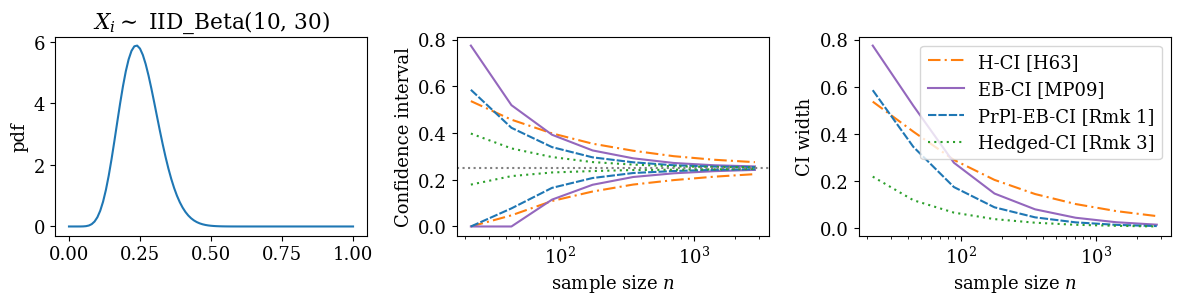

In [29]:
N = (2**8) * 11
alpha = 0.05
times = 11 * (2** np.arange(1,9))

cs_list = [
    ConfseqToPlot(
        lambda x: hoeffding_ci(x, times=times, alpha=alpha),
        "H-CI [H63]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x: maurer_pontil_empbern_ci(x, times=times, alpha=alpha),
        "EB-CI [MP09]",
        "tab:purple",
        "-",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_ci_seq(
            x, times=times, truncation=1 / 2, alpha=alpha, parallel=True
        ),
        "PrPl-EB-CI [Rmk 1]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_ci_seq(
            x, times=times, alpha=alpha, parallel=True, m_trunc=True, trunc_scale=3 / 4
        ),
        "Hedged-CI [Rmk 3]",
        "tab:green",
        ":",
  
    ),
]

dgp_list_iid = [

    DataGeneratingProcess(
        data_generator_fn=lambda: np.random.beta(10, 30, N),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ IID_Beta(10, 30)",
    ),
]

plot_CSs(
    dgp_list_iid,
    cs_list,
    times=times,
    time_uniform=False,
    display_start=1,
    nsim=5,
    log_scale=True,
    folder=figures_location,
);

Plot for QMC:

Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
H-CI [H63] took an average of 4.267692565917969e-05 seconds
H-CI [H63] miscovered in 0 out of 5 experiments
EB-CI [MP09] took an average of 0.00016922950744628905 seconds
EB-CI [MP09] miscovered in 0 out of 5 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.13068976402282714 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 5 experiments
Hedged-CI [Rmk 3] took an average of 0.4398928165435791 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 5 experiments


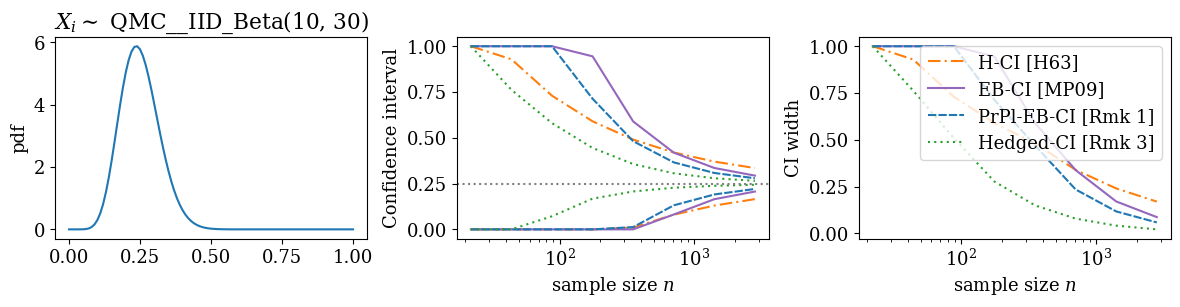

In [30]:
def gen_qmc_samples_iid(distribution = qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1,seed = 7),scipy_distribs=beta(a=10,b=30))
                         , spawn_samples = 11 ,gen_samples = 2**8):
    spw = distribution
    spws = spw.spawn(spawn_samples)
    samples = spws[0].gen_samples(gen_samples).flatten()
    for i in range (len(spws)- 1):
        curr_samples = spws[i + 1].gen_samples(gen_samples).flatten()
        samples = np.vstack((samples,curr_samples))
    return np.mean(samples, axis = 0)

spawn_samples = 11
gen_samples = 2**8
alpha = 0.05
times = 2** np.arange(1,9)

cs_list = [
    ConfseqToPlot(
        lambda x: hoeffding_ci(x, times=times, alpha=alpha),
        "H-CI [H63]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x: maurer_pontil_empbern_ci(x, times=times, alpha=alpha),
        "EB-CI [MP09]",
        "tab:purple",
        "-",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_ci_seq(
            x, times=times, truncation=1 / 2, alpha=alpha, parallel=True
        ),
        "PrPl-EB-CI [Rmk 1]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_ci_seq(
            x, times=times, alpha=alpha, parallel=True, m_trunc=True, trunc_scale=3 / 4
        ),
        "Hedged-CI [Rmk 3]",
        "tab:green",
        ":",
  
    ),
]

dgp_list_qmc = [

    DataGeneratingProcess(
        data_generator_fn=lambda: gen_qmc_samples_iid(),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="QMC_Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ QMC__IID_Beta(10, 30)",
    ),
]

plot_CSs(
    dgp_list_qmc,
    cs_list,
    times=spawn_samples * times,
    time_uniform=False,
    display_start=1,
    nsim=5,
    log_scale=True,
    folder=figures_location,
);

## IID vs QMC (no spawning)

Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores
Using 11 cores
Using 11 cores
Using 11 cores
Using 11 cores
Using 11 cores
Using 11 cores
Using 11 cores
H-CI [H63] took an average of 0.00010457038879394532 seconds
H-CI [H63] miscovered in 0 out of 5 experiments
EB-CI [MP09] took an average of 0.00012683868408203125 seconds
EB-CI [MP09] miscovered in 0 out of 5 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.13237385749816893 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 5 experiments
Hedged-CI [Rmk 3] took an average of 0.4268803596496582 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 5 experiments
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
H-CI [H63] took an average of 4.2057037353515626e-05 seconds
H-CI [H63] miscovered in 0 out of 5 experiments
EB-CI [MP09] took an average of 0.00012602806091308594 seconds
EB-CI [MP09] miscovered in 0 out of 5 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.1330568313598633 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 5 experiments
Hedged-CI [Rmk 3] took an average of 0.41080636978149415 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 5 experiments


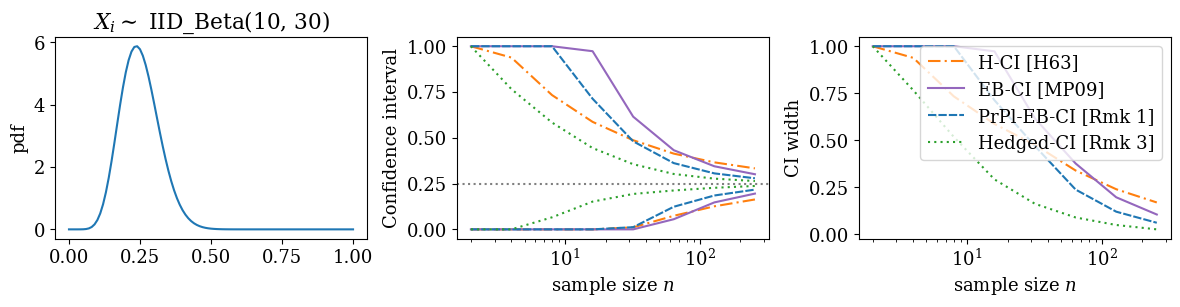

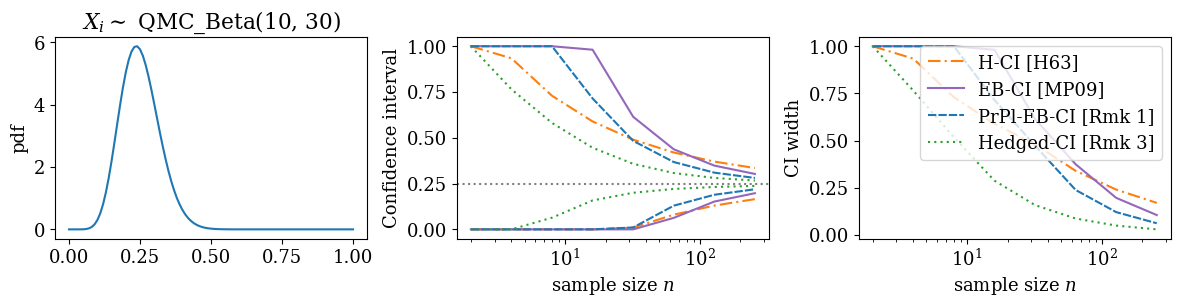

In [31]:
N = 2**8
alpha = 0.05
times = (2** np.arange(1,9))

cs_list = [
    ConfseqToPlot(
        lambda x: hoeffding_ci(x, times=times, alpha=alpha),
        "H-CI [H63]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x: maurer_pontil_empbern_ci(x, times=times, alpha=alpha),
        "EB-CI [MP09]",
        "tab:purple",
        "-",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_ci_seq(
            x, times=times, truncation=1 / 2, alpha=alpha, parallel=True
        ),
        "PrPl-EB-CI [Rmk 1]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_ci_seq(
            x, times=times, alpha=alpha, parallel=True, m_trunc=True, trunc_scale=3 / 4
        ),
        "Hedged-CI [Rmk 3]",
        "tab:green",
        ":",
  
    ),
]

dgp_list_iid = [

    DataGeneratingProcess(
        data_generator_fn=lambda: np.random.beta(10, 30, N),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ IID_Beta(10, 30)",
    ),
    DataGeneratingProcess(
        data_generator_fn= lambda: (qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1),scipy_distribs=beta(a=10,b=30)).gen_samples(N)).flatten(),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ QMC_Beta(10, 30)",
    ),
]

plot_CSs(
    dgp_list_iid,
    cs_list,
    times=times,
    time_uniform=False,
    display_start=1,
    nsim=5,
    log_scale=True,
    folder=figures_location,
);